<Body>   
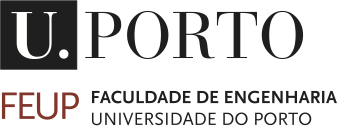   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **May 22** in your corresponding practical class. Upload the files until 23:59 of **June 2, 2023**.


---



# **Identification**

* **Group:** A02H
* **Name:** Duarte Ribeiro Afonso Branco
* **Student Number:** 201905327

* **Name:** Maria Inês Agostinho Simões
* **Student Number:** 201904665


---




**Initial setup:** To download the data files, run the next cell.

In [ ]:
!wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
!unzip data-setMLproject2.zip -d.


Archive:  data-setMLproject2.zip
  inflating: ./data_test.csv         
  inflating: ./__MACOSX/._data_test.csv  
  inflating: ./data_test2obs.csv     
  inflating: ./__MACOSX/._data_test2obs.csv  
  inflating: ./data_train.csv        
  inflating: ./__MACOSX/._data_train.csv  


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [ ]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
#df

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ taken at time $t=1.0\,s$.


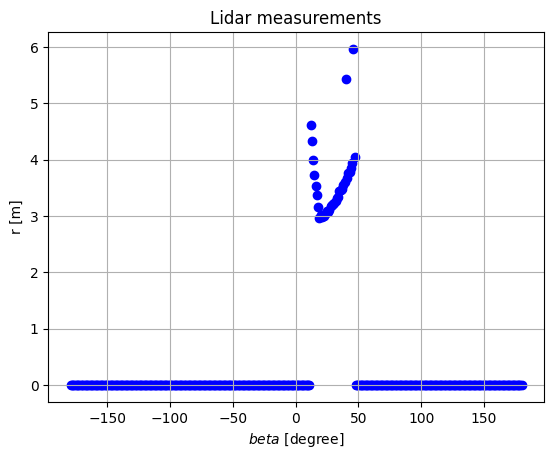

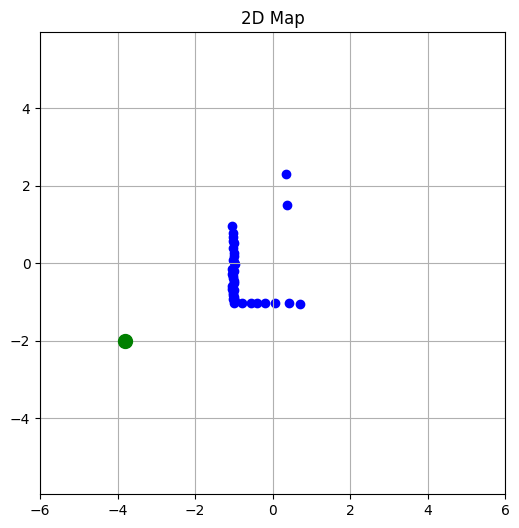

In [ ]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()


Note that it may be possible to have more than one object in the range of the LIDAR. \\
Here goes an example when $t=32\,s$:


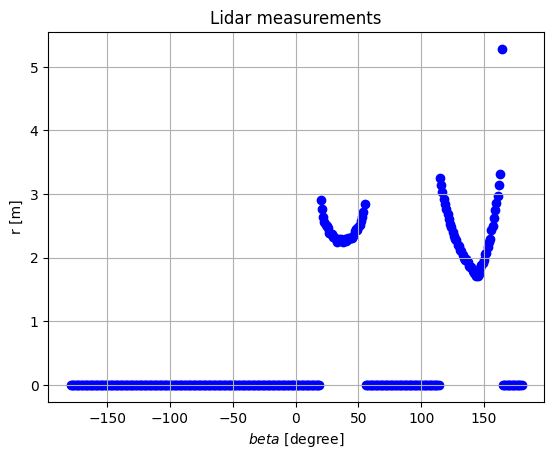

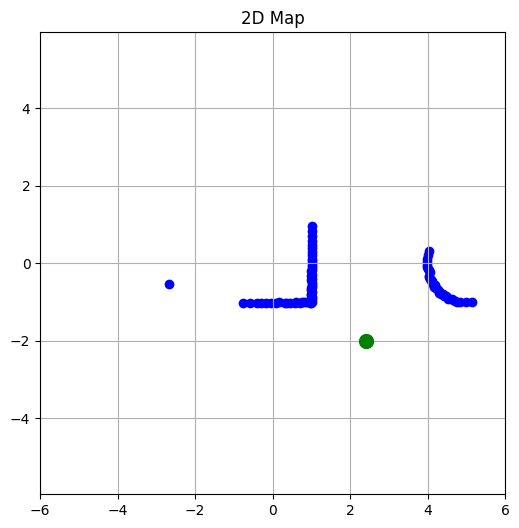

In [ ]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ \\
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. \\
All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

In [ ]:
import pandas as pd
df_train = pd.read_csv('data_train.csv', index_col=0)
df_train

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.06,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.48,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.58,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.10,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.48,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.60,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2236,-2.12,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2237,-2.80,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2238,1.18,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
import pandas as pd
df_test = pd.read_csv('data_test.csv', index_col=0)
df_test

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.46,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
1,0.38,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,2.58,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,-2.84,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
4,-2.56,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,3.32,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.752938,2.789123,2.869662,2.960473,3.041882,3.292784,0.0,0.0,0.0,1.0
956,3.62,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
957,2.20,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.381054,1.557405,1.728042,2.111385,2.553902,0.000000,0.0,0.0,0.0,2.0
958,-2.98,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. \\
Do not use sklearn or similar packages (use the results of notebook #7).

In [ ]:
################
# KNN FUNCTION #
################

def vector2norm(x, data):
  npoints = data.shape[0]
  distances = np.zeros(npoints)
  save = data[:, np.arange(0, 360, 1)]
  for i in range(npoints) :
    #distances[i] = np.sqrt( ( x[0] - data[i][0] ) **2 + ( x[1] - data[i][1] ) **2 )
    #distances[i] = np.sum( abs( x - data[i, :-1] ) )
    distances[i] = np.linalg.norm(x - save[i])
  return distances

"""
PARAMETROS
  k: número de nearest neighbors a considerar
  x: vetor a ser classificado
  data: valores da training data
"""

def kNN_classifier(k, x, data):
  npoints = data.shape[0]
  # calcular distancias do ponto x a todos os pontos da training data
  dist = vector2norm(x, data)
  # colocar por ordem
  ind = np.argsort(dist, axis = 0)
  classes = data[:, -1]
  classes_sorted = classes[ind]
  # qual a classe com mais elementos
  c1 = 0
  c2 = 0
  for i in range(k):
    if classes_sorted[i] == 1:
      c1 += 1
    else:
      c2 += 1
  if c1 > c2:
    return 1
  else:
    return 2



**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ \\
Note that accuracy is defined as
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.


In [ ]:
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = np.append(X_train, np.reshape(Y_train, (len(Y_train), 1)), axis=1)

X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

k_values = [1, 3, 5, 7, 9]

######################################
# TRAINING AND TESTING DATA ACCURACY #
######################################

correct_train = np.zeros(len(k_values))
total_train = np.zeros(len(k_values))

for k in k_values:
  prediction_train = []

  for t in range(len(X_train)):
    prediction_train.append(kNN_classifier(k, X_train[t], data_train))
  prediction_train = np.array(prediction_train)

  TP, TN, FP, FN = 0, 0, 0, 0

  for j in range(len(prediction_train)):
    if prediction_train[j] == 1 and Y_train[j] == 1:
      TP += 1
    elif prediction_train[j] == 2 and Y_train[j] == 2:
      TN += 1
    elif prediction_train[j] == 1 and Y_train[j] == 2:
      FN += 1
    elif prediction_train[j] == 2 and Y_train[j] == 1:
      FP += 1

  acc_train = (TP + TN) / (TP + TN + FP + FN)

  prediction_test = []

  for t in range(len(X_test)):
    prediction_test.append(kNN_classifier(k, X_test[t], data_test))
  prediction_test = np.array(prediction_test)

  TP, TN, FP, FN = 0, 0, 0, 0

  for j in range(len(prediction_test)):
    if prediction_test[j] == 1 and Y_test[j] == 1:
      TP += 1
    elif prediction_test[j] == 2 and Y_test[j] == 2:
      TN += 1
    elif prediction_test[j] == 1 and Y_test[j] == 2:
      FN += 1
    elif prediction_test[j] == 2 and Y_test[j] == 1:
      FP += 1

  acc_test = (TP + TN) / (TP + TN + FP + FN)

  print(f"Accuracy for k={k}: Training data = {100.0*acc_train:4.2f}%, Testing data = {100.0*acc_test:4.2f}%")


Accuracy for k=1: Training data = 100.00%, Testing data = 100.00%
Accuracy for k=3: Training data = 99.87%, Testing data = 100.00%
Accuracy for k=5: Training data = 99.64%, Testing data = 99.17%
Accuracy for k=7: Training data = 99.82%, Testing data = 98.85%
Accuracy for k=9: Training data = 99.78%, Testing data = 97.29%


**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function;

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set. \\
**Do not use** PyTorch, TensorFlow or similar packages (check notebook #8). \\
**Tip:** It is important to shuffle the training data. You may get better results with non constant learning rate. A final loss below 0.05 is good!


In [ ]:
import numpy as np
np.random.seed(42)

X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = np.append(X_train, np.reshape(Y_train, (len(Y_train), 1)), axis=1)

X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

N_INPUTS = 10  #Number of inputs
N_HIDDEN = 5
N_OUTPUTS = 1

###################
# ANN OF TYPE MLP #
###################

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

# ReLu activation function:
def relu(x):
  return np.maximum(0, x)

# Derivative of ReLu
def deriv_relu(x):
    return np.where(x > 0, 1, 0)

class NeuralNetwork:
  '''
  Structure of the neural network:
    - N_INPUTS inputs
    - a hidden layer with 5 neurons (h1, h2, h3, h4, h5)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # valores random para os biases e weights
    # biases
    self.bi1 = np.random.random()
    self.bi2 = np.random.random()
    self.bi3 = np.random.random()
    self.bi4 = np.random.random()
    self.bi5 = np.random.random()
    self.bo = np.random.random()

    # weights
    self.wi1 = np.random.randn(N_INPUTS)
    self.wi2 = np.random.randn(N_INPUTS)
    self.wi3 = np.random.randn(N_INPUTS)
    self.wi4 = np.random.randn(N_INPUTS)
    self.wi5 = np.random.randn(N_INPUTS)

    self.wo1, self.wo2, self.wo3, self.wo4, self.wo5 = np.random.random(5)

  def feedforward(self, x):
    '''
    - x is a numpy array with N_INPUTS elements
    '''
    # hidden layer
    self.sum_h1 = np.dot(self.wi1, x) + self.bi1
    self.sum_h2 = np.dot(self.wi2, x) + self.bi2
    self.sum_h3 = np.dot(self.wi3, x) + self.bi3
    self.sum_h4 = np.dot(self.wi4, x) + self.bi4
    self.sum_h5 = np.dot(self.wi5, x) + self.bi5

    self.h1 = relu(self.sum_h1)
    self.h2 = relu(self.sum_h2)
    self.h3 = relu(self.sum_h3)
    self.h4 = relu(self.sum_h4)
    self.h5 = relu(self.sum_h5)

    # output layer
    self.sum_o = self.wo1*self.h1 + self.wo2*self.h2 + self.wo3*self.h3 + self.wo4*self.h4 + self.wo5*self.h5 + self.bo
    self.o = sigmoid(self.sum_o)
    return self.o


  def train(self, data, y_trues, learn_rate = 0.1, epochs = 500):
    '''
    - data is a (n x N_INPUTS) numpy array, n = # of samples in the dataset.
    - y_trues is a numpy array with n elements.
      Elements in y_true correspond to those in data.
    '''
    loss_prev = 10000  #loss_prev is the loss of the previous iteration

    for epoch in range(epochs):
      for x, y_true in zip(data, y_trues):

        # 1. feedforward step
        y_pred = self.feedforward(x)

        # 2. backpropagation step
        # partial derivatives
        d_L_d_ypred = -2 * (y_true - y_pred)

        # output layer:  neuron o1
        d_ypred_d_wo1 = self.h1 * deriv_sigmoid(self.sum_o)
        d_ypred_d_wo2 = self.h2 * deriv_sigmoid(self.sum_o)
        d_ypred_d_wo3 = self.h3 * deriv_sigmoid(self.sum_o)
        d_ypred_d_wo4 = self.h4 * deriv_sigmoid(self.sum_o)
        d_ypred_d_wo5 = self.h5 * deriv_sigmoid(self.sum_o)

        d_ypred_d_bo = deriv_sigmoid(self.sum_o)

        d_ypred_d_h1 = self.wo1 * deriv_sigmoid(self.sum_o)
        d_ypred_d_h2 = self.wo2 * deriv_sigmoid(self.sum_o)
        d_ypred_d_h3 = self.wo3 * deriv_sigmoid(self.sum_o)
        d_ypred_d_h4 = self.wo4 * deriv_sigmoid(self.sum_o)
        d_ypred_d_h5 = self.wo5 * deriv_sigmoid(self.sum_o)


        # hidden Layer: neurons h
        d_h1_d_wi1 = x * deriv_relu(self.sum_h1)
        d_h2_d_wi2 = x * deriv_relu(self.sum_h2)
        d_h3_d_wi3 = x * deriv_relu(self.sum_h3)
        d_h4_d_wi4 = x * deriv_relu(self.sum_h4)
        d_h5_d_wi5 = x * deriv_relu(self.sum_h5)

        d_h1_d_bi1 = deriv_relu(self.sum_h1)
        d_h2_d_bi2 = deriv_relu(self.sum_h2)
        d_h3_d_bi3 = deriv_relu(self.sum_h3)
        d_h4_d_bi4 = deriv_relu(self.sum_h4)
        d_h5_d_bi5 = deriv_relu(self.sum_h5)

        # 3. gradient descent
        # output layer:  neuron o

        self.wo1 -= learn_rate * d_L_d_ypred * d_ypred_d_wo1
        self.wo2 -= learn_rate * d_L_d_ypred * d_ypred_d_wo2
        self.wo3 -= learn_rate * d_L_d_ypred * d_ypred_d_wo3
        self.wo4 -= learn_rate * d_L_d_ypred * d_ypred_d_wo4
        self.wo5 -= learn_rate * d_L_d_ypred * d_ypred_d_wo5

        self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

        # hidden layer: neuron h
        self.wi1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_wi1
        self.wi2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_wi2
        self.wi3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_wi3
        self.wi4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_wi4
        self.wi5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_wi5

        self.bi1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_bi1
        self.bi2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_bi2
        self.bi3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_bi3
        self.bi4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_bi4
        self.bi5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_bi5


      # 4. performance assessment (per epoch)
      if epoch % 5 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(y_trues, y_preds)
        print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
        #Uncomment this part to enable a nonconstant learning rate
        if loss > loss_prev:  #if loss did not decrease, let's decrease the learn_rate
          if learn_rate > 0.002:
            learn_rate = learn_rate*.9  #decrease 90% of the previous value
          print("I'm at epoch", epoch, "with new learn_rate: ", learn_rate)
        loss_prev = loss



# Create the ANN
model = NeuralNetwork()

# Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j += 1

# Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1

#Shuffling the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

# Train the ANN
model.train(trainingset_X, trainingset_Y, learn_rate = 0.1, epochs = 1000)

Epoch 0  --> Loss: 0.2153
Epoch 5  --> Loss: 0.1814
Epoch 10  --> Loss: 0.1736
Epoch 15  --> Loss: 0.1668
Epoch 20  --> Loss: 0.1636
Epoch 25  --> Loss: 0.1497
Epoch 30  --> Loss: 0.1414
Epoch 35  --> Loss: 0.1391
Epoch 40  --> Loss: 0.1318
Epoch 45  --> Loss: 0.1446
I'm at epoch 45 with new learn_rate:  0.09000000000000001
Epoch 50  --> Loss: 0.1380
Epoch 55  --> Loss: 0.1318
Epoch 60  --> Loss: 0.1242
Epoch 65  --> Loss: 0.1207
Epoch 70  --> Loss: 0.1178
Epoch 75  --> Loss: 0.1100
Epoch 80  --> Loss: 0.1036
Epoch 85  --> Loss: 0.0973
Epoch 90  --> Loss: 0.0895
Epoch 95  --> Loss: 0.0809
Epoch 100  --> Loss: 0.0780
Epoch 105  --> Loss: 0.0821
I'm at epoch 105 with new learn_rate:  0.08100000000000002
Epoch 110  --> Loss: 0.0852
I'm at epoch 110 with new learn_rate:  0.07290000000000002
Epoch 115  --> Loss: 0.0776
Epoch 120  --> Loss: 0.0794
I'm at epoch 120 with new learn_rate:  0.06561000000000002
Epoch 125  --> Loss: 0.0619
Epoch 130  --> Loss: 0.0629
I'm at epoch 130 with new learn

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write in a brief sentence of the main conclusions about the classifiers (k-NN and ANN) until this point.


O classificador de k-NN tem uma accuracy de mais de 97% enquanto que o ANN apenas com 94%.

In [ ]:
##################################
# CLASSIFICATION OF TRAINING SET #
##################################

classification_train = []
for t in range(len(trainingset_X)):
    classification_train.append( model.feedforward(trainingset_X[t]) )
classification_train = np.array(classification_train)

############################
# ACCURACY OF TRAINING SET #
############################

TP, TN, FP, FN = 0, 0, 0, 0

for j in range(len(classification_train)):
  if (classification_train[j] >= 0.5 and trainingset_Y[j] == 1):
    TP += 1
  elif (classification_train[j] < 0.5 and trainingset_Y[j] == 0):
    TN += 1
  elif (classification_train[j] >= 0.5 and trainingset_Y[j] == 0):
    FN += 1
  elif (classification_train[j] < 0.5 and trainingset_Y[j] == 1):
    FP += 1

acc_train = (TP + TN) / (TP + TN + FP + FN)

print("Number of misclassified samples in the training data: ", FP + FN, "in", len(trainingset_Y))

acc_train = (TP + TN) / (TP + TN + FP + FN)

print(f"Accuracy of the model on training set: {100.0*acc_train:4.2f}%")

########################
# CREATING TESTING SET #
########################

test_set_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        test_set_X[t][j] = X_test[t][i]
        j += 1

test_set_Y = Y_test - 1

from sklearn.utils import shuffle
test_set_X, test_set_Y = shuffle(test_set_X, test_set_Y, random_state=42)

#################################
# CLASSIFICATION OF TESTING SET #
#################################

classification_test = []
for t in range(len(test_set_X)):
    classification_test.append( model.feedforward(test_set_X[t]) )
classification_test = np.array(classification_test)


###########################
# ACCURACY OF TESTING SET #
###########################

TP, TN, FP, FN = 0, 0, 0, 0

for j in range(len(classification_test)):
  if (classification_test[j] >= 0.5 and test_set_Y[j] == 1):
    TP += 1
  if (classification_test[j] < 0.5 and test_set_Y[j] == 0):
    TN += 1
  if (classification_test[j] >= 0.5 and test_set_Y[j] == 0):
    FN += 1
  if (classification_test[j] < 0.5 and test_set_Y[j] == 1):
    FP += 1


print("Number of misclassified samples in the training data: ", FP + FN, "in", len(trainingset_Y))

acc_test = (TP + TN) / (TP + TN + FP + FN)

print(f"Accuracy of the model on training set: {100.0*acc_test:4.2f}%")




Number of misclassified samples in the training data:  113 in 2240
Accuracy of the model on training set: 94.96%
Number of misclassified samples in the training data:  55 in 2240
Accuracy of the model on training set: 94.27%


# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for
1. $t=1\,s$ (which has only one object) and
2. for $t=32\,s$ (which has 2 objects).

What can you conclude? \\

Como podemos observar nas iterações mostradas nas figuras o algoritmo evolui do modo esperado: \\
 1º -  Os centróides iniciais são aleatórios. \\
 2º -  Em cada iteração os centroides convergem no sentido de diminuir o erro identificando os dois clusters. \\
 3º -  Quando o erro não diminui entre iterações os centróides são os finais, sendo atribuídos aos pontos o respetivo cluster. \\


Observando os resultados, que variam cada vez que o código é compilado devido ao caráter aleatório dos centróides, a aproximação das centróides aos clusters tem um desempenho bastante positivo tanto para um objeto como para dois objetos. \\


Do not use sklearn or similar packages (use the results of notebook #10).


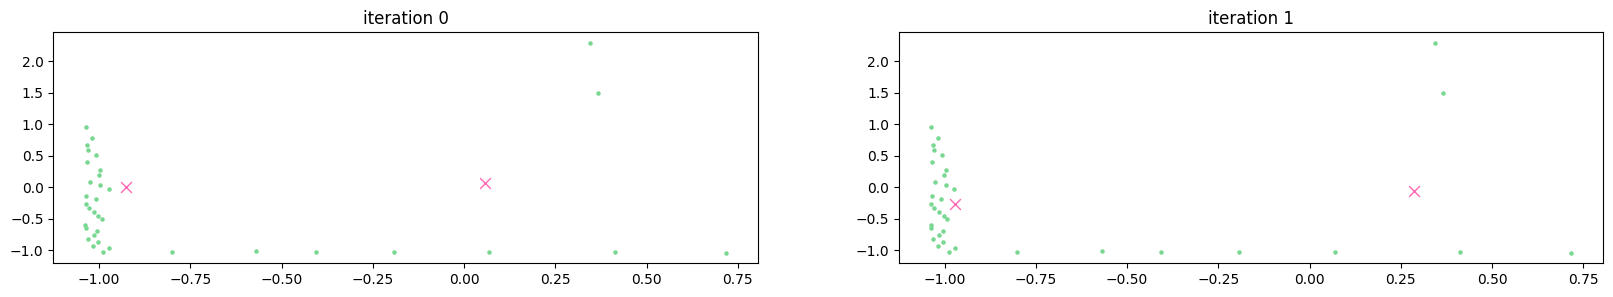

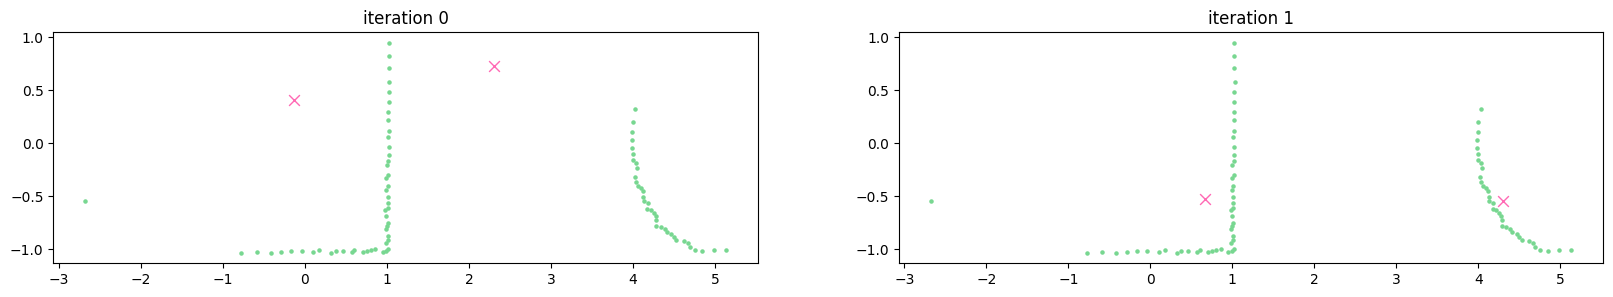

In [ ]:
# k-means clustering on the 2D map coordinates of the range measurements
# feito para separar a data em dois grupos cada um referente a um unico objeto

def kmeans_func(X_func, K_func, show_plot = 0, ini_method = 0):
  '''
    X_func - sample points
    K_func - number of clusters
    showplot 0/1 - not / show centroid evolution over iterations
    ini_method 0/1 - ini centroids  0=> random centroids within data boundaries
                                    1=> from the sample points (risky!)
  '''
  cluster = np.zeros(X_func.shape[0], dtype = int)
  centr_ini = []
  if ini_method:
    # from the sample points
    for i in range(K_func):
      centr_ini.append(X_func[i])
  else:
    # random centroids within data boundaries
    max_x = max(X_func[:,0]);
    min_x = min(X_func[:,0]);
    max_y = max(X_func[:,1]);
    min_y = min(X_func[:,1]);

    for i in range(K_func):
      centr_ini.append([random.uniform(min_x, max_x),random.uniform(min_y, max_y)])

  iter = 0 # controlar iteração atual
  diff = 1 # controlar se os centroides mudaram entre iterações
  centroids = centr_ini # inicializar
  centr_list = [centroids] # array de centroids

  # loop corre até diff ser 0, ou seja, centroides deixaram de mudar
  while diff:

    # para cada ponto, calcula distancia a cada centroide e guarda a mais próxima
    # cria um cluster com estas centroides
    for sample_i, sample_pt in enumerate(X_func): # para cada ponto
      min_dist = float('inf')
      for centroid_i, centroid in enumerate(centroids):
        dist =  np.sqrt((centroid[0] - sample_pt[0])**2 + (centroid[1] - sample_pt[1])**2)
        if dist < min_dist:
            min_dist = dist
            cluster[sample_i] = centroid_i

    # calcular novas centroides fazendo a media das coordenadas de todos os pontos de cada cluster
    sum = np.zeros((K_func, 2))
    cnt = np.zeros(K_func)
    for sample_i, sample_pt in enumerate(X_func):
      sum[cluster[sample_i]] += X_func[sample_i]
      cnt[cluster[sample_i]] += 1
    new_centroids = np.zeros((K_func,2))
    for k in range(K_func):
      if (cnt[k] > 0):
        new_centroids[k] = sum[k] / cnt[k]
      else:
        # primeira iteração
        new_centroids[k] = [random.uniform(min_x, max_x),random.uniform(min_y, max_y)]



    # termina loop se centroides forem iguais
    # atualiza centroides com novas calculadas caso contrário
    if np.count_nonzero(centroids - new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
      centr_list.append(new_centroids)
    iter = iter + 1

  # plotting
  if show_plot:
    cols = min(iter, 6) # maximo 6 plots
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,3))
    for col in range(min(cols, iter)):
      ax[col].scatter(X_func[:, 0], X_func[:, 1], s=5,  c='#78D791', marker = 'o', alpha = 1, linewidths = 1)
      i = round(iter/cols*col)
      if (col == cols - 1):
        i = iter - 1
      for j in range(K_func):
        centr_plot_x = centr_list[i][j][0]
        centr_plot_y = centr_list[i][j][1]
        #ax[col].scatter(centr_plot_x, centr_plot_y, c=j, s=60, alpha=1, cmap='rainbow')
        ax[col].scatter(centr_plot_x, centr_plot_y, color = 'hotpink', s=60, alpha=1, marker = 'x', linewidths = 1)
        ax[col].title.set_text("iteration " + str(i) )
    plt.show()

  return centroids, cluster

###########################
# CLOUD POINTS FOR T = 1S #
###########################

x_o_1, y_o_1 = [], []

t = 1*10
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o_1.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o_1.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

X_1 = np.array([x_o_1, y_o_1]).T
centr_1, clust_1 = kmeans_func(X_1, 2, show_plot=1, ini_method=0)

############################
# CLOUD POINTS FOR T = 32S #
############################

x_o_32, y_o_32 = [], []

t = 32*10
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o_32.append(px[t] + Lidar_range[t][i] * np.cos(angle[i]/180*np.pi))
    y_o_32.append(py[t] + Lidar_range[t][i] * np.sin(angle[i]/180*np.pi))

X_32 = np.array([x_o_32, y_o_32]).T
centr_32, clust_32 = kmeans_func(X_32, 2, show_plot=1, ini_method=0)


**2.2**
Using the previous results,
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?


Nesta alínea foi feita a separação das snapshots para utilizar o mesmo algoritmo que foi implementado em alíneas anteriores. No entanto, como não existe forma de confirmar se foram bem classificadas todas as snapshots (não existe label para confirmar se foi bem classificado), tem que se confiar que os exemplos que foram escolhidos para fazer plot são representativos do resto do algoritmo.

No entanto, este método nem sempre tem os melhores resultados. O ANN Classifier que foi implementado anteriormente, apesar de ter uma accuracy de mais de 94%, em conjunto com os valores incertos resultantes do K-Means também implementado anteriormente apresenta classificações bastante divergente sempre que se compila. Nos últimos snapshots é quando se nota a maior divergência dos resultados, onde o círculo é classficado como quadrado.

O valor do threshold foi obtido analisando todos os valores do cost_list e ao testar foi este o valor que oferecia maior segurança nos resultados ao separar os snapshots.

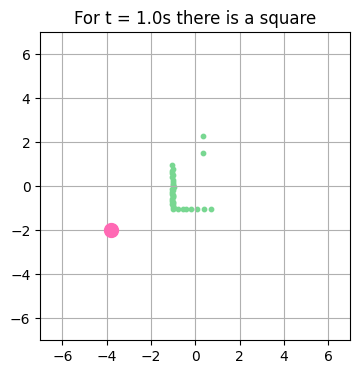

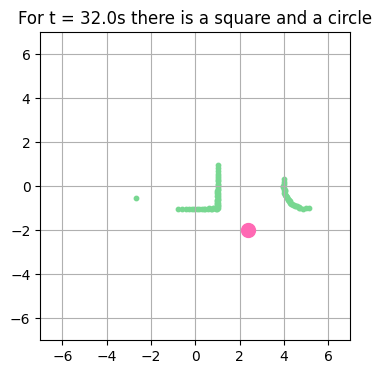

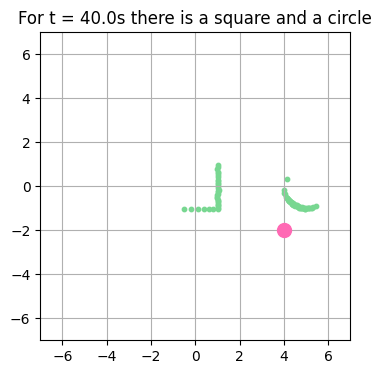

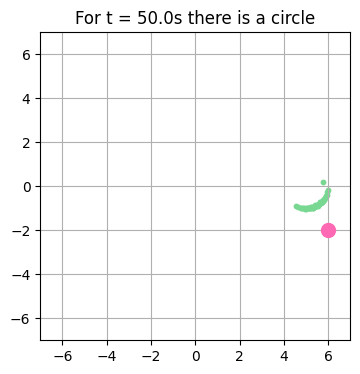

In [ ]:
threshold = 25  # to decide if k=1 or k=2

# reset data para o caso de ter sido alterada anteriormente
N_INPUTS = 10

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values
angle = np.linspace(-179, 180, num=360)

# measure of how well the data points are clustered around their respective cluster centers
def SSE(X, centroids, cluster):
    '''
    returns the Sum of Squared Error
    X: the 2D points
    centroids: the cluster centers
    cluster: the cluster that each data point belongs to
    '''
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[cluster[i], 0] - val[0])**2 + (centroids[cluster[i], 1] - val[1])**2)
    return sum

testingset_X_2 = np.array([])

# list para guardar os valores de tempo que correspondem ao novo array testingset_X_2
time_single = []

# percorrer todos os snapshots de Lidar_range
for t in range(len(Lidar_range)):
    x_o, y_o = [], []

    # cloud points at instant t
    for i in range(len(Lidar_range[t])):
        if Lidar_range[t][i] > 0:
            x_o.append(px[t] + Lidar_range[t][i] * np.cos(angle[i] / 180 * np.pi))
            y_o.append(py[t] + Lidar_range[t][i] * np.sin(angle[i] / 180 * np.pi))

    X = np.array([x_o, y_o]).T

    cost_list = []
    k_range = range(1, 3)  # 1 or 2

    # k-means clustering de k e guardar o valor em cost_list para cada objeto (ou seja clust)
    for k in k_range:
      centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0)
      cost = SSE(X, centr, clust)
      cost_list.append(cost)

    # decidir que tem 1 ou 2 objetos ao comparar com o valor do threshold
    if cost_list[1] > threshold:
        # 2 objetos
        X_feature1, X_feature2 = np.zeros([N_INPUTS]), np.zeros([N_INPUTS])
        j1, j2 = 0, 0
        for i in range(len(x_o)):
          if j1 < N_INPUTS:
            if clust[i] == 0:
              X_feature1[j1] = np.sqrt((x_o[i] - px[t])**2 + (y_o[i] - py[t])**2)
              j1 += 1
          if j2 < N_INPUTS:
            if clust[i] == 1:
              X_feature2[j2] = np.sqrt((x_o[i] - px[t])**2 + (y_o[i] - py[t])**2)
              j2 += 1
        if len(testingset_X_2) == 0:
          testingset_X_2 = np.array([X_feature1, X_feature2])
          # adicionar duas vezes o tempo porque se adicionou duas linhas ao testingset_X_2 dos objetos separados
          time_single.append(t)
          time_single.append(t)
        else:
          testingset_X_2 = np.concatenate((testingset_X_2, np.array([X_feature1, X_feature2])))
          time_single.append(t)
          time_single.append(t)

    else:
        # 1 objeto
        X_feature1 = np.zeros([N_INPUTS])
        j1 = 0
        for i in range(len(x_o)):
            if j1 < N_INPUTS:
                if clust[i] == 0:
                    X_feature1[j1] = np.sqrt((x_o[i] - px[t])**2 + (y_o[i] - py[t])**2)
                    j1 += 1
        if len(testingset_X_2) == 0:
          testingset_X_2 = np.array([X_feature1])
          time_single.append(t)
        else:
          testingset_X_2 = np.concatenate((testingset_X_2, np.array([X_feature1])))
          time_single.append(t)

##################################
# CLASSIFICATION OF NEW DATA SET #
##################################

classification_double = []

for t in range(len(testingset_X_2)):
  classification_double.append( model.feedforward(testingset_X_2[t]) )
classification_double = np.array(classification_double)

########
# PLOT #
########

times_to_plot = [1*10, 32*10, 40*10, 50*10]

for time in times_to_plot:
  x_o_double, y_o_double = [], []
  for i in range(len(Lidar_range[time])):
    if Lidar_range[time][i] > 0:
      x_o_double.append(px[time]+Lidar_range[time][i]*np.cos(angle[i]/180*np.pi))
      y_o_double.append(py[time]+Lidar_range[time][i]*np.sin(angle[i]/180*np.pi))

  plt.figure(figsize=(4,4))
  xdim, ydim = 6, 6
  plt.xlim(-xdim-1,xdim+1)
  plt.ylim(-ydim-1,ydim+1)
  plt.plot(px[time], py[time], color='hotpink', marker='o', markersize=10)  #position of the robot
  plt.grid()
  plt.scatter(x_o_double, y_o_double, c='#78D791', s = 10)

  time_single_index = time_single.index(time)

  # escolher qual a legenda tendo em conta a classification nova

  # só um objeto
  if(time_single[time_single_index] != time_single[time_single_index + 1]):
    if(classification_double[time_single_index] >= 0.5).any():
      plt.title(f"For t = {time_single[time_single_index]/10}s there is a square")
    elif(classification_double[time_single_index] < 0.5).any():
      plt.title(f"For t = {time_single[time_single_index]/10}s there is a circle")
  # dois objetos
  elif(time_single[time_single_index] == time_single[time_single_index + 1]):
    if(classification_double[time_single_index] >= 0.5 and classification_double[time_single_index + 1] < 0.5).any():
      plt.title(f"For t = {time_single[time_single_index]/10}s there is a square and a circle")
    elif(classification_double[time_single_index] < 0.5 and classification_double[time_single_index + 1] >= 0.5).any():
      plt.title(f"For t = {time_single[time_single_index]/10}s there is a square and a circle")

  plt.show()


**2.3 (Extra)**
Using now PyTorch or TensorFlow (or other similar package), implement a better ANN (meaning with a better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class XOR_Classifier_Module(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1         = nn.Linear(num_inputs, num_hidden)
        self.activation_f1   = nn.ReLU()
        self.linear2         = nn.Linear(num_hidden, num_outputs)
        self.activation_sig  = nn.Sigmoid()           #  COMMENT if nn.BCEWithLogitsLoss is selected.

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.activation_f1(x)
        x = self.linear2(x)
        x = self.activation_sig(x)                   #  COMMENT if nn.BCEWithLogitsLoss is selected.
        return x


model_Tensor = XOR_Classifier_Module(num_inputs=10, num_hidden=5, num_outputs=1)

X_train_Tensor = np.array(trainingset_X)
Y_train_Tensor = np.array(trainingset_Y)

X_test_Tensor = np.array(test_set_X)
Y_test_Tensor = np.array(test_set_Y)

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_train_Tensor).float(), torch.from_numpy(Y_train_Tensor).float())
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_test_Tensor).float(), torch.from_numpy(Y_test_Tensor).float())
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

# Specific model parameters
for name, param in model_Tensor.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

# All model parameter
model_Tensor.state_dict()   #PyTorch assigns random values to these weights and biases

from tqdm.notebook import trange, tqdm

def train_model(model, optimizer, dataloader, loss_criteria, num_epochs=1000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in dataloader:

            ## Step 0 (needed in case of GPU): Move input data to device
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 1: setting gradients to zero. The gradients would not be overwritten but actually added to the existing ones.
            optimizer.zero_grad()

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l

            ## Step 3: Calculate the loss
            loss = loss_criteria(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            loss.backward()

            ## Step 5: Update parameters based on the calculated gradients
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(dataloader)

        if epoch % 5 == 0:
            print('[%d] loss: %.3f' % (epoch + 1, epoch_loss))



def eval_model(model, data_loader):
    # Set model to eval mode
    model.eval()

    true_preds, num_preds = 0., 0.

    # Deactivate gradients for the following code
    with torch.no_grad():

        # get batch of images from the test DataLoader
        for data_inputs, data_labels in data_loader:
            ## Step 0 (needed in case of GPU): Move input data to device
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

            # Step 1: determine prediction of model
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l

            # Step 2: Binarize predictions to 0 and 1
            pred_labels = (preds >= 0.5).long()

            # Step 3: Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

optimizer = torch.optim.SGD(model_Tensor.parameters(), lr=0.1)
loss_module =  nn.MSELoss() # or nn.BCEWithLogitsLoss()  nn.BCELoss()

train_model(model_Tensor, optimizer, train_dataloader, loss_module)
eval_model(model_Tensor, test_dataloader)



Parameter linear1.weight, shape torch.Size([5, 10])
Parameter linear1.bias, shape torch.Size([5])
Parameter linear2.weight, shape torch.Size([1, 5])
Parameter linear2.bias, shape torch.Size([1])


  0%|          | 0/1000 [00:00<?, ?it/s]

[1] loss: 0.250
[6] loss: 0.222
[11] loss: 0.207
[16] loss: 0.201
[21] loss: 0.194
[26] loss: 0.190
[31] loss: 0.189
[36] loss: 0.186
[41] loss: 0.181
[46] loss: 0.182
[51] loss: 0.183
[56] loss: 0.173
[61] loss: 0.163
[66] loss: 0.160
[71] loss: 0.147
[76] loss: 0.139
[81] loss: 0.138
[86] loss: 0.130
[91] loss: 0.128
[96] loss: 0.122
[101] loss: 0.127
[106] loss: 0.118
[111] loss: 0.116
[116] loss: 0.114
[121] loss: 0.114
[126] loss: 0.117
[131] loss: 0.108
[136] loss: 0.105
[141] loss: 0.105
[146] loss: 0.100
[151] loss: 0.095
[156] loss: 0.086
[161] loss: 0.093
[166] loss: 0.083
[171] loss: 0.091
[176] loss: 0.086
[181] loss: 0.082
[186] loss: 0.074
[191] loss: 0.075
[196] loss: 0.078
[201] loss: 0.085
[206] loss: 0.064
[211] loss: 0.071
[216] loss: 0.081
[221] loss: 0.071
[226] loss: 0.070
[231] loss: 0.066
[236] loss: 0.064
[241] loss: 0.061
[246] loss: 0.065
[251] loss: 0.064
[256] loss: 0.065
[261] loss: 0.058
[266] loss: 0.056
[271] loss: 0.055
[276] loss: 0.055
[281] loss: 0.